In [1]:
import matplotlib.pyplot as plt
import numpy as np


## Problem Definition: 
Define an array of ice thickness for the 30 days for which we want to calculate the ice- thickness evolution: 
`h_ice = np.zeros(days)`. Set the initial ice thickness to 0.1 m, i.e. `h_ice[0] = 0.1`. You then should use a `for day in range(1,days)`:-loop to calculatethe ice thickness for days 2 to 30. Inside your for loop, calculate  rst the heat flux Q in the ice based on the thickness of the previous day `h_ice[day-1]`. Then calculate the
thickness change that this heat flux can cause within one day. 

Add this thickness change to the thickness from the day before, and you have the ice thickness for the current day, h_ice[day]. Then you go back to the beginning of the for loop to calculate the thickness
on the next day etc.

1. Plot your ice thickness evolution for these 30 days
2. How thick does your ice get in the end?
3. How thick should the ice be after 30 days if you solve the differential equation analytically? This solution is called "Stefan's law", by the way.

### Stefan's Law

$ \large -K \frac{dT}{h} = L \rho \frac{dh}{dt}$

where 

`K = heat conductivity of ice [W/(m K)]`

`L = Latent heat of freezing for water [ J/kg ]`

`$\rho$ = density of ice`

`h = thickness of ice`



$ \large \Delta h = -K \times \frac{(T_{top} - T_{bottom})}{h} \times \frac{\Delta t}{L \times \rho}$
    


In [2]:
days = 30 # duration of simulation
Tbot = -1.8 # Temperature at the bottom [C]
Ttop = -10
L = 334000 # Latent heat of freezing for water [ J/kg ]
rho = 970 # density of ice [ kg/m^ 3 ]
k_ice = 2.2 # heat conductivity of ice [W/(m K) ]
k_snow = 0.3 # heat conductivity of snow [W/(m K) ]
sec_per_day = 86400

In [3]:
h_ice = np.zeros(days)

In [4]:
h_ice

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
len(h_ice)

30

In [6]:
h_ice[0] = 0.1

In [7]:
h_ice

array([0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. ])

In [8]:
for i in range(1, days):
    delh = (-k_ice * (Ttop - Tbot) * sec_per_day) / (h_ice[i-1] * L * rho) 
    h_ice[i] = delh + h_ice[i-1]    
    
print(len(h_ice))
print(h_ice)

30
[0.1        0.14810964 0.18059208 0.20723203 0.23044738 0.25132401
 0.27046648 0.28825413 0.30494414 0.32072068 0.33572116 0.3500514
 0.36379499 0.37701937 0.38977989 0.40212266 0.41408658 0.42570484
 0.43700601 0.44801493 0.45875333 0.46924037 0.47949303 0.48952647
 0.49935426 0.50898863 0.51844063 0.52772032 0.53683682 0.54579851]


In [9]:
h_analytical = []
for j in range(0, days):
    
    h_aly = np.sqrt((20*k_ice*(j+1)*86400)/(L * rho))
    
    h_analytical.append(h_aly)
    
print(len(h_analytical))
print(h_analytical)

30
[0.10832385544228065, 0.1531930654950159, 0.18762242129777654, 0.2166477108845613, 0.2422195043538001, 0.2653381728045942, 0.28659798255598523, 0.3063861309900318, 0.324971566326842, 0.342550108128433, 0.3592695843467427, 0.3752448425955531, 0.39056721515309184, 0.405310753879442, 0.41953648812493266, 0.4332954217691226, 0.4466306977626616, 0.4595791964850477, 0.47217273904760976, 0.4844390087076002, 0.4964022671337052, 0.5080839187313082, 0.5195029606568596, 0.5306763456091884, 0.5416192772114032, 0.552345452687793, 0.5628672638933296, 0.5731959651119705, 0.5833418141008951, 0.5933141914166586]


Text(0.5, 1.0, '1D Sea Ice Model I')

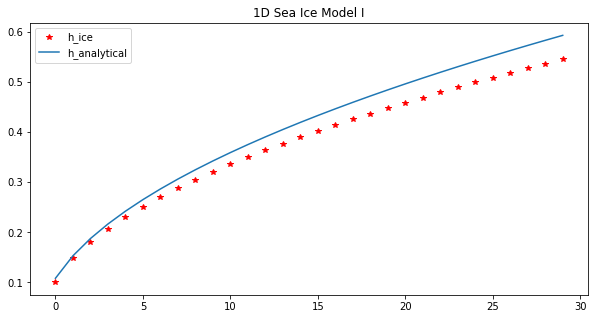

In [10]:
plt.figure(figsize = (10,5))
plt.plot(h_ice, 'r*')
plt.plot(h_analytical)
plt.legend(['h_ice', 'h_analytical'])
plt.title('1D Sea Ice Model I')